In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('https://raw.githubusercontent.com/tatwan/Linear-Regression-Implementation-in-Python/master/datasets/kc_house_data.csv')

In [6]:
Y = dataset[['price']]
X = dataset.drop(['price', 'id', 'date'], axis = 1)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [8]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
X.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

In [11]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### corr

In [13]:
dataset = dataset.drop(['id', 'date'], axis = 1)
dataset.corr(method = 'pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


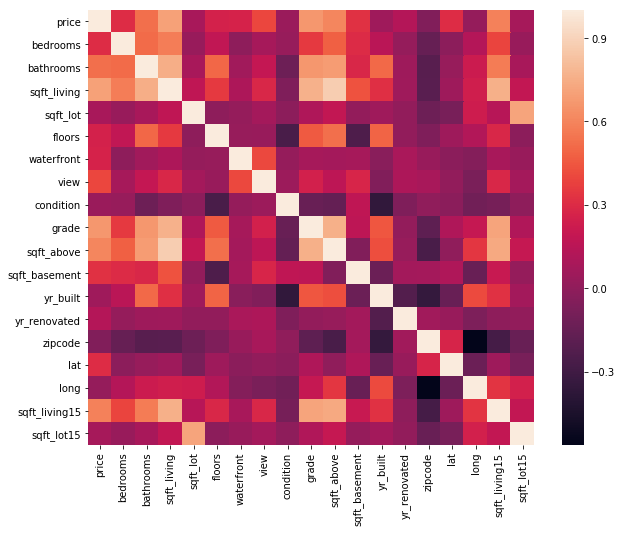

In [14]:
plt.subplots(figsize = (10, 8))
sns.heatmap(dataset.corr())

In [16]:
import statsmodels.api as sm
from statsmodels import tools

X_new = tools.add_constant(X)
model = sm.OLS(endog = Y, exog = X_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:39:34   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
sqft_living     110.4406      2.270     48.661      0.000     105.992     114.889
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
sqft_above       70.7875      2.253     31.415      0.000      66.371      75.204
sqft_basement    39.6599      2.647     14.985      0.000      34.472      44.847
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     3.34e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### simple linear regression

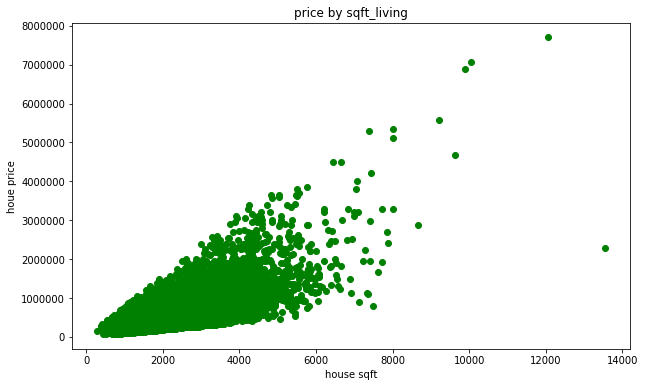

In [17]:
x  = X[['sqft_living']]
y = Y

plt.figure(figsize = (10,6))
plt.xlabel('house sqft')
plt.ylabel('houe price')
plt.title('price by sqft_living')
plt.scatter(x, y, marker = 'o', color = 'g')

### 1. Using seaborn.regplot() and scipy.stats

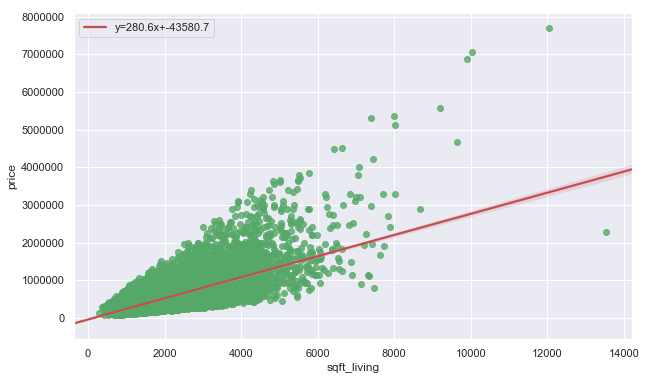

In [19]:
from scipy import stats

sns.set(color_codes = True)

slope, intercept, r_value, p_value, std_err = stats.linregress(dataset['sqft_living'], dataset['price'])

f = plt.figure(figsize = (10, 6))
data = dataset[['price', 'sqft_living']]
ax = sns.regplot(x = 'sqft_living', y = 'price', data = data, scatter_kws = {'color':'g'},
                 line_kws = {'color':'r', 'label':'y={0:.1f}x+{1:.1f}'.format(slope, intercept)})
ax.legend()

In [20]:
print(slope, intercept)

280.62356789744825 -43580.74309447396


In [21]:
print(std_err)

1.9363985519989135


### from 529

In [26]:
path = 'C:\\Users\\lenovo\\Desktop\\Fall 2021\\practice_code\\python practice\\529code'
df1 = pd.read_csv(path+'\\Odometer.csv')
df1.head()

,Odometer,Price
0,37.4,14.6
1,44.8,14.1
2,45.8,14.0
3,30.9,15.6
4,31.7,15.6


In [27]:
Price = df1.Price
Odometer = df1['Odometer']

In [28]:
# correlation both must be series
Price.corr(Odometer)

-0.8051679793300429

In [29]:
# predictors must be in a dataframe
Odometer = pd.DataFrame(Odometer)

### model1 sklearn library

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
m1 = LinearRegression().fit(Odometer, Price)
print(m1.intercept_)
print(m1.coef_)

17.24872734291551
[-0.06686089]


In [33]:
# r-squared
m1.score(Odometer, Price)
# model m1 explains 64.83% of price variability, or
# 64.83% variability of car prices is explained by Odometer readings

0.6482954749384247

In [36]:
# prediction
newval = pd.DataFrame([40], columns = ['Odemeter'])  # test set
newval

,Odemeter
0,40


In [37]:
m1.predict(newval)

array([14.57429193])

In [38]:
# predict all
yhat = m1.predict(Odometer)
df2 = df1.copy()
df2['prediction'] = yhat
df2.head()

,Odometer,Price,prediction
0,37.4,14.6,14.748130
1,44.8,14.1,14.253360
2,45.8,14.0,14.186499
3,30.9,15.6,15.182726
4,31.7,15.6,15.129237


Text(0.5,0,'odometer')

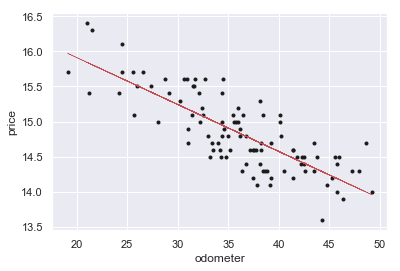

In [44]:
plt.figure()
plt.scatter(Odometer, Price, c = 'k', s = 9)
plt.plot(Odometer, yhat, color = 'r', linewidth = 0.5)
plt.ylabel('price')
plt.xlabel('odometer')
# plt.grid()

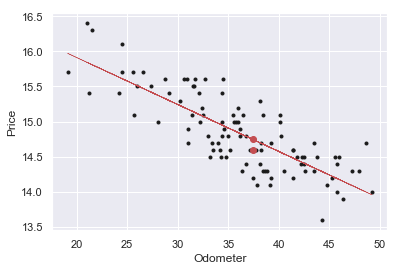

In [45]:
# mark first point
plt.figure()
plt.scatter(Odometer,Price,c='k',s=9)
# add regression line
plt.plot(Odometer,yhat,color = 'r',linewidth = 0.5)
plt.ylabel('Price')
plt.xlabel('Odometer')
# mark point
plt.scatter(Odometer.iloc[0], Price[0], c = 'r')
plt.scatter(Odometer.iloc[0], yhat[0], c = 'r')

### method2 statsmodels.formula.api

In [46]:
import statsmodels.formula.api as smf

In [47]:
m2 = smf.ols(formula = 'Price ~ Odometer', data = df1).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     180.6
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           5.75e-24
Time:                        16:43:46   Log-Likelihood:                -28.948
No. Observations:                 100   AIC:                             61.90
Df Residuals:                      98   BIC:                             67.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2487      0.182     94.725      0.000      16.887      17.610
Odometer      -0.0669      0.005    -13.440      0.000      -0.077      -0.057
==============================================================================
Omnibus:                        5.847   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                2.691
Skew:                           0.042   Prob(JB):                        0.260
Kurtosis:                       2.201   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
m2.params

Intercept    17.248727
Odometer     -0.066861
dtype: float64

In [49]:
m2.rsquared

0.6482954749384248

In [50]:
m2.rsquared_adj

0.644706653254123

In [51]:
# prediction
newval = pd.DataFrame([40], columns = ['Odometer'])
m2.predict(newval)

0    14.574292
dtype: float64

### method 3 statsmodels.api

In [52]:
import statsmodels.api as sm

In [53]:
# statsmodels.api requires predictors array with column of ones
Odometer1 = Odometer.copy()
Odometer1.insert(0, 'const', 1)
Odometer1.head()

,const,Odometer
0,1,37.4
1,1,44.8
2,1,45.8
3,1,30.9
4,1,31.7


In [54]:
m3 = sm.OLS(Price, Odometer1).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     180.6
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           5.75e-24
Time:                        16:52:17   Log-Likelihood:                -28.948
No. Observations:                 100   AIC:                             61.90
Df Residuals:                      98   BIC:                             67.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2487      0.182     94.725      0.000      16.887      17.610
Odometer      -0.0669      0.005    -13.440      0.000      -0.077      -0.057
==============================================================================
Omnibus:                        5.847   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                2.691
Skew:                           0.042   Prob(JB):                        0.260
Kurtosis:                       2.201   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# confidence and prediction
xaxis = range(10, 60)

newval = pd.DataFrame()
newval['Odometer'] = range(10, 60)
newval.insert(0, 'constant', 1)
newval.head()

,constant,Odometer
0,1,10
1,1,11
2,1,12
3,1,13
4,1,14


In [58]:
d2 = m3.get_prediction(newval)
d2.summary_frame().head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,16.580118,0.133451,16.315290,16.844947,15.880178,17.280059
1,16.513258,0.128633,16.257990,16.768526,15.816878,17.209637
2,16.446397,0.123828,16.200665,16.692129,15.753456,17.139337
3,16.379536,0.119036,16.143312,16.615760,15.689910,17.069162
4,16.312675,0.114261,16.085928,16.539421,15.626238,16.999112


C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


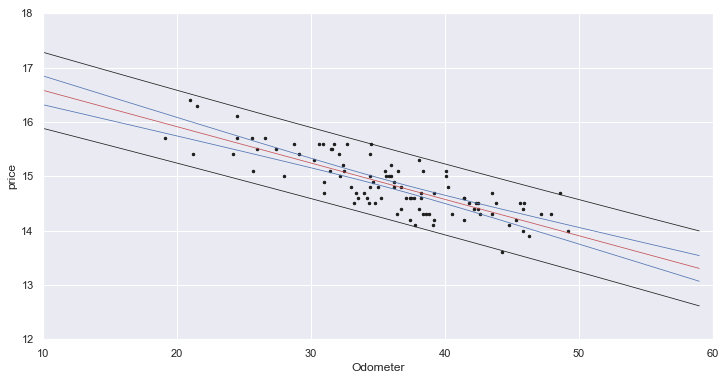

In [59]:
predictions = d2.summary_frame()['mean']
ci_lwr = d2.summary_frame().mean_ci_lower
ci_upr = d2.summary_frame().mean_ci_upper
pi_lwr = d2.summary_frame().obs_ci_lower
pi_upr = d2.summary_frame().obs_ci_upper

plt.figure(figsize = (12, 6))
plt.scatter(Odometer, Price, s = 6, c = 'k')
plt.xlim(10, 60)
plt.ylim(12, 18)
plt.xlabel('Odometer')
plt.ylabel('price')

plt.plot(xaxis, predictions, c = 'r', lw = 0.75)

# plot CIs -blue
plt.plot(xaxis,ci_lwr,c='b',lw=0.75)
plt.plot(xaxis,ci_upr,c='b',lw=0.75)

# plot PIs -black
plt.plot(xaxis,pi_lwr,c='k',lw=0.75)
plt.plot(xaxis,pi_upr,c='k',lw=0.75);

### multiple linear regression

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('529code/Cars93.csv')

In [62]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [63]:
list1 = ['MPG.city','Cylinders','EngineSize','Horsepower',
         'RPM','Passengers','Weight']
df1 = df[list1]
df1.head()

,MPG.city,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
0,25,4,1.8,140,6300,5,2705
1,18,6,3.2,200,5500,5,3560
2,20,6,2.8,172,5500,5,3375
3,19,6,2.8,172,5500,6,3405
4,22,4,3.5,208,5700,4,3640


In [64]:
df1.dtypes

MPG.city        int64
Cylinders      object
EngineSize    float64
Horsepower      int64
RPM             int64
Passengers      int64
Weight          int64
dtype: object

In [65]:
# cylinders is not numeric
df1.Cylinders.unique()

array(['4', '6', '8', '3', 'rotary', '5'], dtype=object)

In [66]:
pd.value_counts(df1.Cylinders)
# only one car with rotary cylinder

4         49
6         31
8          7
3          3
5          2
rotary     1
Name: Cylinders, dtype: int64

In [68]:
# remove it
df2 = df1[df1.Cylinders != 'rotary'].copy()

# change type
df2.Cylinders = df2.Cylinders.astype('int64')
df2.dtypes

MPG.city        int64
Cylinders       int64
EngineSize    float64
Horsepower      int64
RPM             int64
Passengers      int64
Weight          int64
dtype: object

In [70]:
# x y
y0 = df2['MPG.city']
x0 = df2.drop(columns = 'MPG.city', axis = 1)

### sklearn

In [71]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(x0, y0)
print(model1.intercept_)
print(model1.coef_)

36.91997468801259
[ 0.1014525   0.87431541 -0.03032167  0.00161991 -0.2384795  -0.00661264]


In [72]:
pd.DataFrame(model1.coef_, 
             columns = ['coef'], 
             index = x0.columns)

,coef
Cylinders,0.101453
EngineSize,0.874315
Horsepower,-0.030322
RPM,0.001620
Passengers,-0.238479
Weight,-0.006613


In [74]:
# prediction
newvalue = x0[:1].copy()
newvalue.Cylinders = 6
newvalue.EngineSize = 1.9
newvalue.Horsepower = 150
newvalue.RPM = 6600
newvalue.Passengers = 6
newvalue.Weight = 2800

model1.predict(newvalue)

array([25.38678406])

### statsmodels.api

In [75]:
import statsmodels.api as sm

In [76]:
x1 = x0.copy()
x1.insert(0, 'const', 1)
x1.head()

,const,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
0,1,4,1.8,140,6300,5,2705
1,1,6,3.2,200,5500,5,3560
2,1,6,2.8,172,5500,5,3375
3,1,6,2.8,172,5500,6,3405
4,1,4,3.5,208,5700,4,3640


In [77]:
m1 = sm.OLS(y0, x1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MPG.city   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     38.61
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           2.79e-22
Time:                        19:26:59   Log-Likelihood:                -228.40
No. Observations:                  92   AIC:                             470.8
Df Residuals:                      85   BIC:                             488.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9200      7.294      5.062      0.000      22.417      51.423
Cylinders      0.1015      0.570      0.178      0.859      -1.031       1.234
EngineSize     0.8743      1.076      0.813      0.419      -1.264       3.013
Horsepower    -0.0303      0.023     -1.344      0.183      -0.075       0.015
RPM            0.0016      0.001      1.418      0.160      -0.001       0.004
Passengers    -0.2385      0.540     -0.441      0.660      -1.313       0.836
Weight        -0.0066      0.002     -4.006      0.000      -0.010      -0.003
==============================================================================
Omnibus:                       51.274   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.138
Skew:                           1.723   Prob(JB):                     8.72e-52
Kurtosis:                      10.034   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
m1.params

const         36.919975
Cylinders      0.101453
EngineSize     0.874315
Horsepower    -0.030322
RPM            0.001620
Passengers    -0.238479
Weight        -0.006613
dtype: float64

In [79]:
newvalue.insert(0, 'constant',1)
m1.predict(newvalue)

0    25.386784
dtype: float64

In [80]:
d2 = m1.get_prediction(newvalue)
d2.summary_frame(alpha = 0.18)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,25.386784,1.439436,23.440838,27.33273,20.871592,29.901976


Text(0,0.5,'prediction')

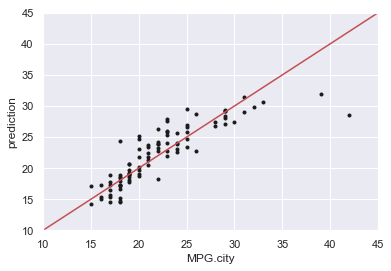

In [81]:
yhat = m1.fittedvalues

xvals = np.linspace(10,45, 100)
yvals = xvals

plt.figure()
plt.scatter(y0,yhat,s=9,color='k')
# plot diagonal line
plt.plot(xvals,yvals,color='r')
plt.xlim(10,45)
plt.ylim(10,45)
plt.xlabel('MPG.city')
plt.ylabel('prediction')

In [83]:
# use residuals to find outlier
dfres = m1.resid
dfres = pd.DataFrame(dfres,columns = ['residuals'])
dfres[:5]

,residuals
0,-0.780371
1,-0.438275
2,-0.160895
3,-0.724036
4,3.711458


In [84]:
dfres[(dfres.residuals == dfres.residuals.max()) | 
      (dfres.residuals == dfres.residuals.min())]

,residuals
41,13.391697
90,-6.439563


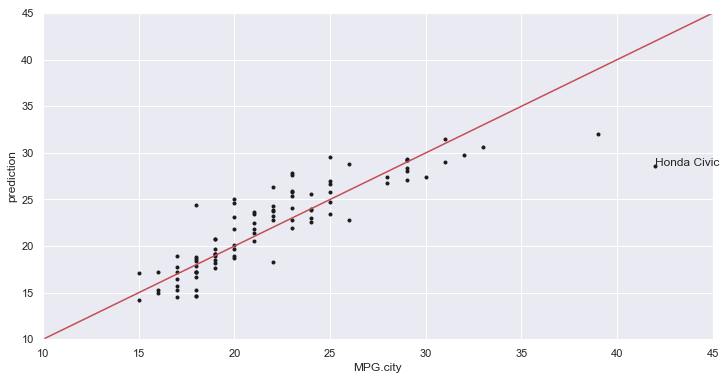

In [87]:
# the largest car name and plot
label41 = df.iloc[41,26]

plt.figure(figsize = (12,6))
plt.scatter(y0,yhat,s=9,color='k')
# plot diagonal line
plt.plot(xvals,yvals,color='r')
plt.xlim(10,45)
plt.ylim(10,45)
plt.xlabel('MPG.city')
plt.ylabel('prediction')
# write car name on the plot
plt.annotate(label41,(y0[41],yhat[41]));

### statsmodels.formula.api

In [88]:
import statsmodels.formula.api as smf

In [89]:
df2.columns

Index(['MPG.city', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM',
       'Passengers', 'Weight'],
      dtype='object')

In [92]:
df2.rename(columns = {'MPG.city':'MPG_city'}, inplace = True)
df2.columns

Index(['MPG_city', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM',
       'Passengers', 'Weight'],
      dtype='object')

In [93]:
m2 = smf.ols(formula = 'MPG_city ~ Cylinders + EngineSize + Horsepower + RPM + Passengers + Weight', data = df2).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MPG_city   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     38.61
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           2.79e-22
Time:                        19:59:04   Log-Likelihood:                -228.40
No. Observations:                  92   AIC:                             470.8
Df Residuals:                      85   BIC:                             488.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9200      7.294      5.062      0.000      22.417      51.423
Cylinders      0.1015      0.570      0.178      0.859      -1.031       1.234
EngineSize     0.8743      1.076      0.813      0.419      -1.264       3.013
Horsepower    -0.0303      0.023     -1.344      0.183      -0.075       0.015
RPM            0.0016      0.001      1.418      0.160      -0.001       0.004
Passengers    -0.2385      0.540     -0.441      0.660      -1.313       0.836
Weight        -0.0066      0.002     -4.006      0.000      -0.010      -0.003
==============================================================================
Omnibus:                       51.274   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.138
Skew:                           1.723   Prob(JB):                     8.72e-52
Kurtosis:                      10.034   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
m2.predict(newvalue)

### categorical

In [95]:
# plot
pd.set_option('display.width', 90)
df = pd.read_csv('529code/Cars93.csv')
df.dtypes

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [97]:
# change numercial to object variables
df['Passengers'] = df['Passengers'].astype(object)

df.columns = df.columns.str.replace('.', '_')
df.dtypes

Manufacturer           object
Model                  object
Type                   object
Min_Price             float64
Price                 float64
Max_Price             float64
MPG_city                int64
MPG_highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev_per_mile            int64
Man_trans_avail        object
Fuel_tank_capacity    float64
Passengers             object
Length                  int64
Wheelbase               int64
Width                   int64
Turn_circle             int64
Rear_seat_room        float64
Luggage_room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [98]:
df2 = df.loc[:, df.dtypes == object]
df2.head()

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man_trans_avail,Passengers,Origin,Make
0,Acura,Integra,Small,None,Front,4,Yes,5,non-USA,Acura Integra
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,5,non-USA,Acura Legend
2,Audi,90,Compact,Driver only,Front,6,Yes,5,non-USA,Audi 90
3,Audi,100,Midsize,Driver & Passenger,Front,6,Yes,6,non-USA,Audi 100
4,BMW,535i,Midsize,Driver only,Rear,4,Yes,4,non-USA,BMW 535i


### Regression with a Categorical Variable with two categories

In [99]:
df.Origin.value_counts()

USA        48
non-USA    45
Name: Origin, dtype: int64

In [100]:
list1 = ['Price','MPG_city','Origin']
df3 = df[list1].copy()
df3.sample(6)

,Price,MPG_city,Origin
85,18.2,22,non-USA
33,15.9,22,USA
54,16.5,26,non-USA
59,14.1,23,USA
43,8.0,29,non-USA
20,15.8,23,USA


In [101]:
df.pivot_table(values = 'Price', index = 'Origin')

,Price
Origin,
USA,18.572917
non-USA,20.508889


In [104]:
df.groupby('Origin')['Price'].mean()

Origin
USA        18.572917
non-USA    20.508889
Name: Price, dtype: float64

In [105]:
df_usa = df3[df3.Origin== 'USA']
df_nonusa = df3[df3.Origin != 'USA']

Text(0,0.5,'Price')

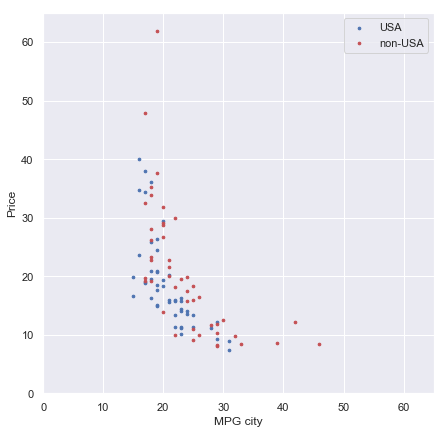

In [107]:
plt.figure(figsize = (7,7))
plt.scatter(df_usa.MPG_city,df_usa.Price,c='b',s=7,label = 'USA')
plt.scatter(df_nonusa.MPG_city,df_nonusa.Price,c='r',s=7,label='non-USA')
# axis limits
plt.axis(xmin=0,xmax=65,ymin=0,ymax=65)
plt.legend()
plt.xlabel('MPG city')
plt.ylabel('Price')

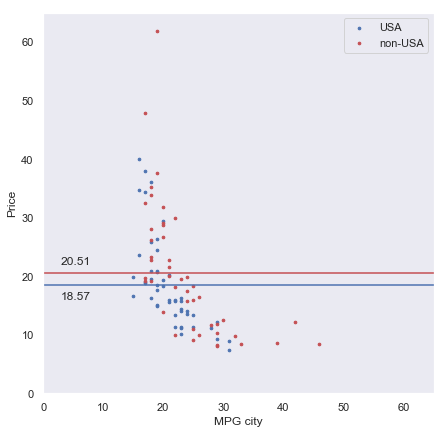

In [115]:
plt.figure(figsize = (7,7))
plt.scatter(df_usa.MPG_city,df_usa.Price,c='b',s=7,label = 'USA')
plt.scatter(df_nonusa.MPG_city,df_nonusa.Price,c='r',s=7,label='non-USA')
# horizontal lines
price_us = df.Price[df.Origin == 'USA'].mean()
price_nonus = df.Price[df.Origin != 'USA'].mean()
plt.axhline(price_us,c='b')
plt.axhline(price_nonus,c='r')

# add prices
rprice_us = round(price_us,2)
rprice_nonus = round(price_nonus,2)
plt.annotate(rprice_us,(3,16))
plt.annotate(rprice_nonus,(3,22))

# axis limits
plt.axis(xmin=0,xmax=65,ymin=0,ymax=65)
plt.legend()
plt.xlabel('MPG city')
plt.ylabel('Price')
plt.grid()

In [116]:
# model
m1 = smf.ols(formula = 'Price ~ MPG_city + C(Origin)', data = df).fit()
m1.params

Intercept               42.555991
C(Origin)[T.non-USA]     5.264041
MPG_city                -1.144322
dtype: float64

Text(0,0.5,'Price')

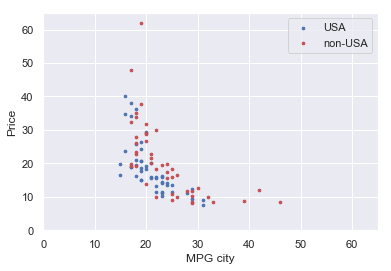

In [118]:
yhat = m1.fittedvalues
df3['yhat'] = yhat

# plt.figure(figsize = (8,8))
# USA cars
plt.scatter(df_usa.MPG_city,df_usa.Price,c='b',s=7,label = 'USA')
# non-USA cars
plt.scatter(df_nonusa.MPG_city,df_nonusa.Price,c='r',s=7,label='non-USA')

# axis limits for plot box
plt.axis(xmin=0,xmax=65,ymin=0,ymax=65)
plt.legend()
plt.xlabel('MPG city')
plt.ylabel('Price')


In [ ]:
# with interaction the same

### one-hot encoding with sklearn

In [120]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [122]:
data0 = pd.read_csv('529code/small.csv')

data2 = data0.copy()
y = data2.Y
X = data2.drop(columns = 'Y', axis = 1)

X_binary = pd.get_dummies(X, columns = ['X1'])

X_binary.drop(columns = 'X1_S', inplace = True)

X_binary.columns = ['X2', 'L', 'M']
X_binary = X_binary.reindex(columns = ['M','L','X2'])

m2 = LinearRegression().fit(X_binary, y)
m2.score(X_binary,y)

0.9926482907525312

In [124]:
m2.coef_

array([-14.07601525,   1.19741635,   0.81550189])

In [125]:
m2.intercept_

19.964997063572714

### statsmodels.formula.api

In [ ]:
import statsmodels.formula.api as smf

In [126]:
m3 = smf.ols('Y ~ C(X1,Treatment(reference = "S")) + X2',
             data=data0).fit()
m3.summary()

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     225.0
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           9.42e-06
Time:                        21:04:40   Log-Likelihood:                -8.3472
No. Observations:                   9   AIC:                             24.69
Df Residuals:                       5   BIC:                             25.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               19.9650      0.580     34.413      0.000      18.474      21.456
C(X1, Treatment(reference="S"))[T.L]     1.1974      0.671      1.786      0.134      -0.526       2.921
C(X1, Treatment(reference="S"))[T.M]   -14.0760      0.670    -20.998      0.000     -15.799     -12.353
X2                                       0.8155      0.138      5.920      0.002       0.461       1.170
==============================================================================
Omnibus:                        0.672   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.529
Skew:                           0.003   Prob(JB):                        0.768
Kurtosis:                       1.812   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### forecast seasonal sales

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [127]:
df = pd.read_csv('529code/part2.csv')
dates = pd.date_range(start = '2012-01-01', end = '2017-01-01', freq = 'M')
dates

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30', '2012-05-31',
               '2012-06-30', '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31',
               '2012-11-30', '2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31',
               '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31',
               '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30',
               '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30',
               '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11

In [128]:
df['Date'] = dates
df.tail()

,Month,Year,sales,Date
55,August,2016,2.23,2016-08-31
56,September,2016,NaN,2016-09-30
57,October,2016,NaN,2016-10-31
58,November,2016,NaN,2016-11-30
59,December,2016,NaN,2016-12-31


In [129]:
df.dtypes

Month            object
Year              int64
sales           float64
Date     datetime64[ns]
dtype: object

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0,0.5,'Sales')

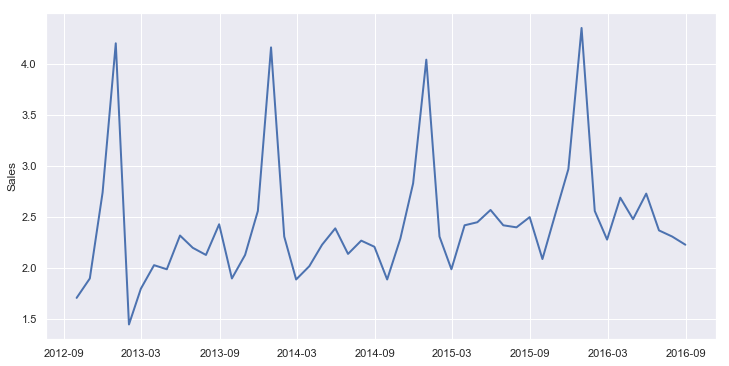

In [131]:
plt.figure(figsize = (12,6))
plt.plot(df['Date'],df['sales'],linewidth = 2)
plt.xlabel("")
plt.ylabel("Sales")

In [132]:
model3 = smf.ols('sales ~ Year + C(Month)', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:15:27   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
sqft_living     110.4406      2.270     48.661      0.000     105.992     114.889
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
sqft_above       70.7875      2.253     31.415      0.000      66.371      75.204
sqft_basement    39.6599      2.647     14.985      0.000      34.472      44.847
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     3.34e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


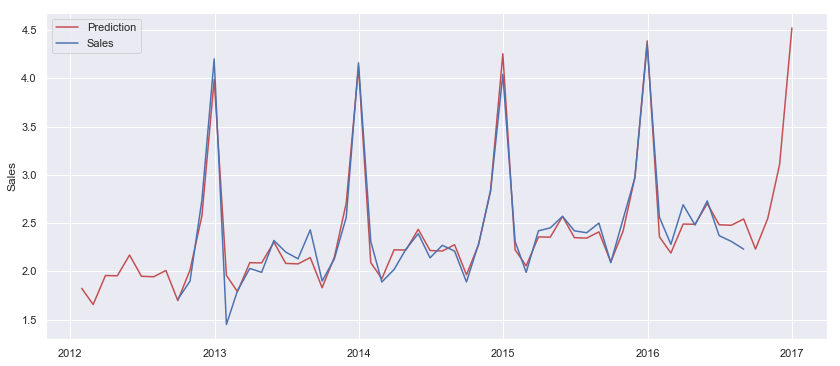

In [134]:
df['prediction'] = model3.predict(df)

plt.figure(figsize = (14,6))
# plot prediction
plt.plot(df['Date'],df['prediction'],'r',label='Prediction')
# plot data
plt.plot(df['Date'],df['sales'],label='Sales',markersize = 4)
plt.xlabel("")
plt.ylabel("Sales")
plt.legend()

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


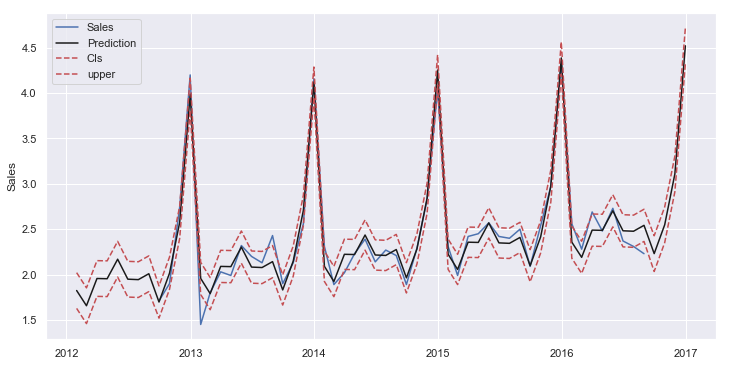

In [135]:
predictions = model3.get_prediction(df)
df2 = predictions.summary_frame()

df2 = df2.iloc[:,[2,3]]
df2.columns = ['lower','upper']

df3 = pd.concat([df,df2],axis=1)

plt.figure(figsize = (12,6))
# plot data
plt.plot(df3['Date'],df3['sales'],label='Sales',markersize = 4)
# plot prediction
plt.plot(df3['Date'],df3['prediction'],'k',label='Prediction')
plt.plot(df3['Date'],df3['lower'],'r--',label='CIs',markersize = 4)
plt.plot(df3['Date'],df3['upper'],'r--',markersize = 4)

plt.xlabel("")
plt.ylabel("Sales")
#plt.xlim('2015-07','2016-12')
plt.legend()